# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

Review data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
#print(flight.head())

flight.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

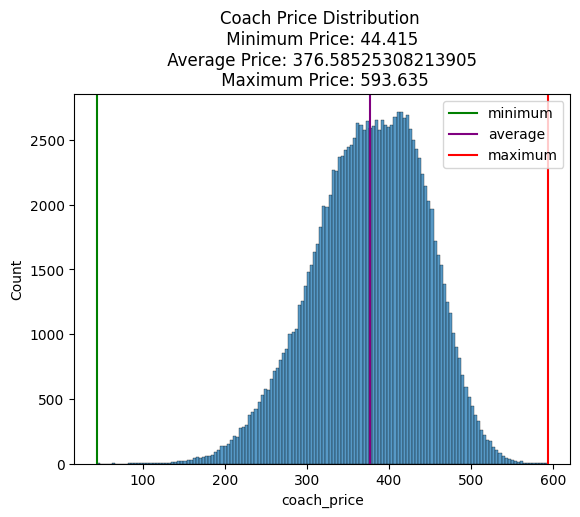

$500 seems like a good price for a coach ticket. This is almost $100 below expected value.


<Figure size 640x480 with 0 Axes>

In [3]:
## Task 1
#Extract coach ticket price data
coach_price = flight.coach_price

# Define min maxc and average for coach_price
min_coach_price = coach_price.min()
max_coach_price = coach_price.max()
avg_coach_price = np.mean(coach_price)

#Plot histogram of coach_price
sns.histplot(coach_price)
plt.title(f'Coach Price Distribution \n Minimum Price: {min_coach_price} \n Average Price: {avg_coach_price} \n Maximum Price: {max_coach_price}')
plt.axvline(min_coach_price, color = 'green',  label = 'minimum')
plt.axvline(avg_coach_price, color = 'purple',  label = 'average')
plt.axvline(max_coach_price, color = 'red',  label = 'maximum')
plt.legend()
plt.show()
plt.clf()

print('$500 seems like a good price for a coach ticket. This is almost $100 below expected value.')

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

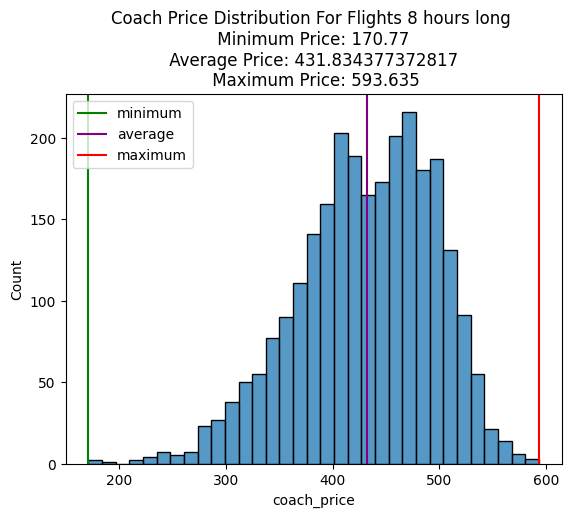

$500 does not seem as reasonable a price for a coach flight that will take 8 hours. This is almost $70 abouve expected value.


In [4]:
## Task 2

#Extract coach ticket price data for flights that are 8 hours long
coach_price_and_hours = flight[['coach_price', 'hours']]
eight_hours_long = coach_price_and_hours[coach_price_and_hours.hours == 8]
eight_hours_long_coach_price = eight_hours_long.coach_price

# Define min max and average coach_price for flights 8 hours long
min_eight_hours_long_coach_price  = eight_hours_long_coach_price.min()
max_eight_hours_long_coach_price = eight_hours_long_coach_price.max()
avg_eight_hours_long_coach_price  = eight_hours_long_coach_price.mean()

#Plot histogram of eight_hours_long_coach_price
sns.histplot(eight_hours_long_coach_price)
plt.title(f'Coach Price Distribution For Flights 8 hours long \n Minimum Price: {min_eight_hours_long_coach_price} \n Average Price: {avg_eight_hours_long_coach_price} \n Maximum Price: {max_eight_hours_long_coach_price}')
plt.axvline(min_eight_hours_long_coach_price , color = 'green',  label = 'minimum')
plt.axvline(avg_eight_hours_long_coach_price, color = 'purple',  label = 'average')
plt.axvline(max_eight_hours_long_coach_price, color = 'red',  label = 'maximum')
plt.legend()
plt.show()
print('$500 does not seem as reasonable a price for a coach flight that will take 8 hours. This is almost $70 abouve expected value.')


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

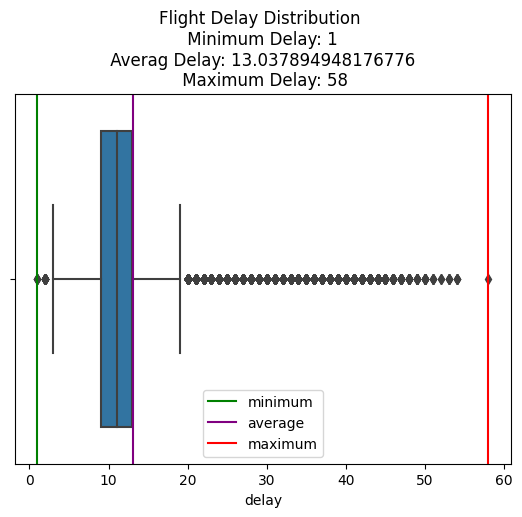

0    0
1    0
2    0
3    0
4    0
Name: delay, dtype: int64

<Figure size 640x480 with 0 Axes>

In [5]:
## Task 3
#Extract delay data 
delay = flight.delay
delay2 = delay[(delay > 0) & (delay < 120)]


# Define min max and average for coach_price
min_delay = delay2.min()
max_delay = delay2.max()
avg_delay = np.mean(delay2)

#Plot histogram of coach_price
sns.boxplot(x = delay2, data = delay2)
plt.title(f'Flight Delay Distribution \n Minimum Delay: {min_delay} \n Averag Delay: {avg_delay} \n Maximum Delay: {max_delay}')
plt.axvline(min_delay, color = 'green',  label = 'minimum')
plt.axvline(avg_delay, color = 'purple',  label = 'average')
plt.axvline(max_delay, color = 'red',  label = 'maximum')
plt.legend()
plt.show()
plt.clf()

delay.head()


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

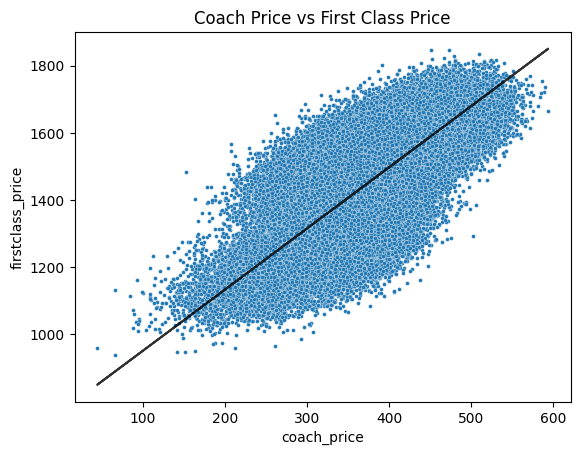

There is a strong positive linear relationship between caoch prices and first class prices.


In [75]:
## Task 4
#Scatterplot of first class vs coach price w/ regression line
model1 = sm.OLS.from_formula('firstclass_price ~ coach_price', data = flight).fit()
sns.scatterplot(x = flight.coach_price, y = flight.firstclass_price, data = flight, s = 8)
plt.plot(flight.coach_price, model1.params[1] * flight.coach_price + model1.params[0], color = 'black', alpha = .8)
plt.plot
plt.title('Coach Price vs First Class Price')
plt.show()

print('There is a strong positive linear relationship between caoch prices and first class prices.')


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

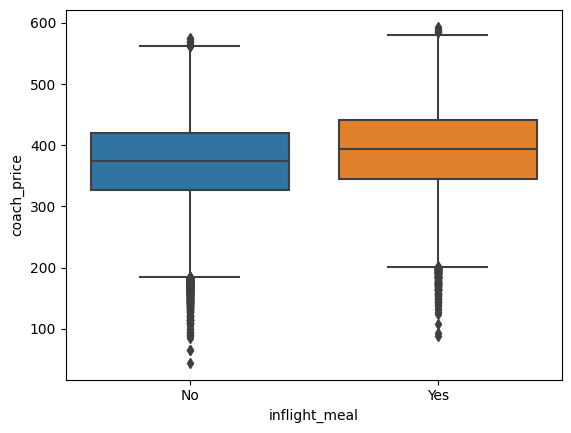

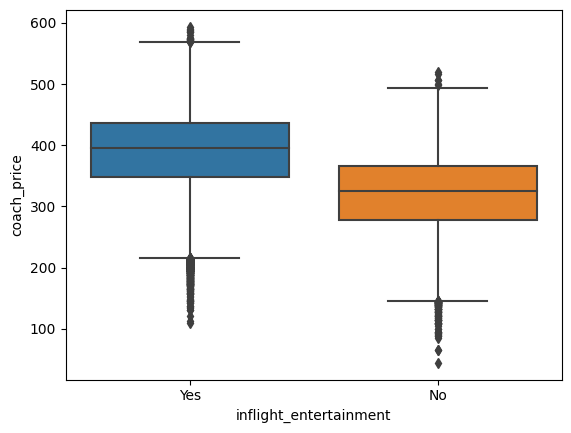

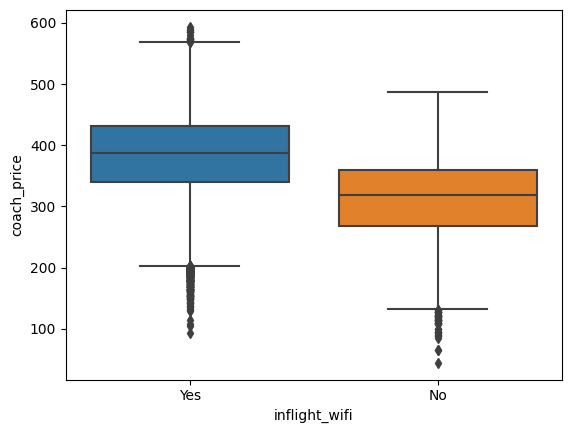

The features that are associated with the highest increase in price are inflight entertainment and inflight wifi.


<Figure size 640x480 with 0 Axes>

In [89]:
## Task 5
#Box plot for inflight_meal and coach_price
sns.boxplot(x = flight.inflight_meal, y = flight.coach_price)
plt.show()
plt.clf()

#Box plot for inflight_entertainment and coach_price
sns.boxplot(x = flight.inflight_entertainment, y = flight.coach_price)
plt.show()
plt.clf()

#Box plot for inflight_wifi and coach_price
sns.boxplot(x = flight.inflight_wifi, y = flight.coach_price)
plt.show()
plt.clf()

print('The features that are associated with the highest increase in price are inflight entertainment and inflight wifi.')

6. How does the number of passengers change in relation to the length of flights?

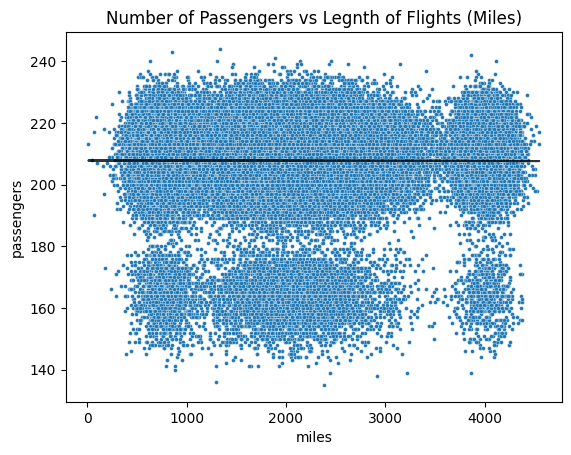

There is no correlation between number of passengers and legnths of flights


In [109]:
## Task 6
model = sm.OLS.from_formula('passengers ~ miles', data = flight).fit()
sns.scatterplot(x = flight.miles, y = flight.passengers, s = 8, data = flight)
plt.plot(flight.miles, model.params[1] * flight.miles + model.params[0], color = 'black', alpha = .8)
plt.title('Number of Passengers vs Legnth of Flights (Miles)')
plt.show()
print('There is no correlation between number of passengers and legnths of flights')


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

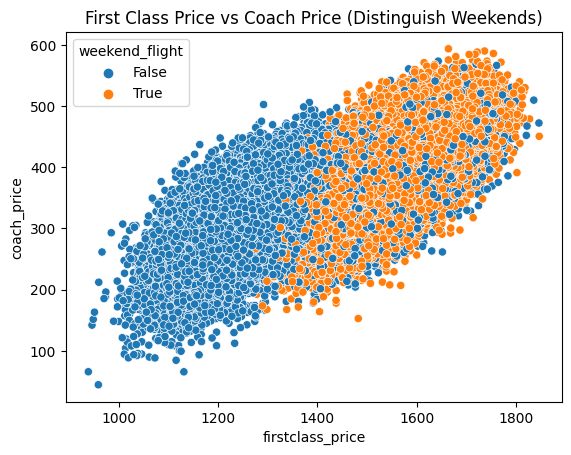

First class prices and coach prices are more expensive for weekend flights


<Figure size 640x480 with 0 Axes>

In [101]:
## Task 7
#Add a column to dataframe that is True if flight is taking place on Saturday or Sunday
flight['weekend_flight'] = flight.apply(lambda row: True if row.day_of_week == 'Saturday' or row.day_of_week == 'Sunday' else False, axis = 1)

# Plot scatterplot of relationships between flights nd highlight flights that take place on weekends 
sns.scatterplot(x = flight.firstclass_price, y = flight.coach_price, hue = flight.weekend_flight)
plt.title('First Class Price vs Coach Price (Distinguish Weekends)')
plt.show()
plt.clf()

print('First class prices and coach prices are more expensive for weekend flights')

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

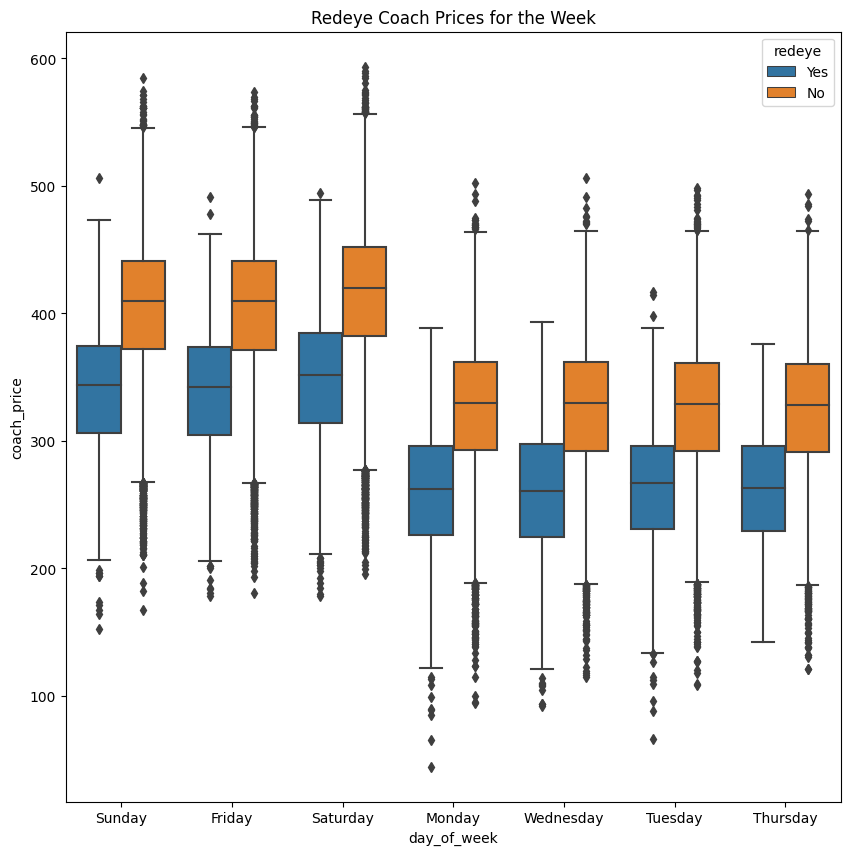

Redeye coach prices are most expensive on Friday Saturday and Sunday.


<Figure size 640x480 with 0 Axes>

In [110]:
## Task 8
#Plot boxplot of days of week and coach prices. Distinguish whether or not flight is redeye.
plt.figure(figsize = (10,10))
sns.boxplot(x = flight.day_of_week, y = flight.coach_price, hue = flight.redeye)
plt.title('Redeye Coach Prices for the Week')
plt.show()
plt.clf()

print('Redeye coach prices are most expensive on Friday Saturday and Sunday.')

